#### Метод дихотомии (бисекции)
**Алгоритм:**
1. Найти интервал $[a,b]$: $f(a) \cdot f(b) < 0$
2. Вычислить середину: $c = \frac{a+b}{2}$
3. Проверить условие остановки: $|b-a| < 2\epsilon$
4. Выбрать новый интервал:
   - Если $f(a) \cdot f(c) < 0$ → $b = c$
   - Иначе → $a = c$

**Количество итераций:**
$$n \ge \log_2\left(\frac{b-a}{\epsilon}\right)$$

#### Метод Ньютона (касательных)
**Итерационная формула:**
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

**Критерии остановки:**
- $|x_{n+1} - x_n| < \epsilon$
- $|f(x_n)| < \epsilon$

**Нелинейное уравнение для поиска корня** (вариант 23):
$$
f(x) = x^{5} - x^{4} - 3x^{3} - 2 = 0, \qquad 
x \in (0,10)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros

#### Общий вид графика $f(x)$

In [2]:
def f(x):
    return x ** 5 - x ** 4 - 3 * x ** 3 - 2 

In [1]:
x = np.linspace(-30, 30, 10000)
plt.plot(x, f(x), label = 'f(x)')
plt.axhline(y = 0, color = 'r')
# plt.axvline(x = 2.3452754959023316, color = 'r')
plt.xlim(-12, 12)
plt.ylim(-20, 20)
plt.grid(True, ls = ':')
plt.legend()
plt.show()

NameError: name 'np' is not defined

#### Вид первой производной функции $f(x)$

In [6]:
def df_dx(x):
    return 5 * x **4 - 4 * x ** 3 - 9 * x ** 2

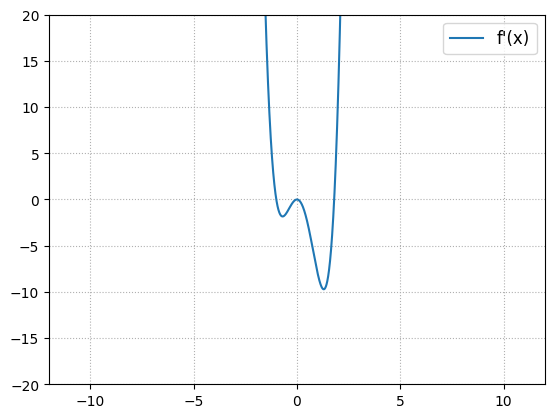

In [7]:
x = np.linspace(-30, 30, 10000)
plt.plot(x, df_dx(x), label = "f'(x)")
# plt.axhline(y = 0, color = 'r')
plt.xlim(-12, 12)
plt.ylim(-20, 20)
plt.grid(True, ls = ':')
plt.legend(fontsize = 12)
plt.show()

#### Метод дихотомии для точностей $\epsilon$ = $10^{-3}, 10^{-6}, 10^{-9}$.

In [8]:
eps_values = [1e-3, 1e-6, 1e-9]
N_max = 50

for i, eps in enumerate(eps_values):
    x = np.zeros(N_max)
    x[0] = 0
    x[1] = 10
    n = 1
    while abs(x[n] - x[n - 1]) > eps:
        x[n + 1] = (x[n] + x[n - 1])/2
        if f(x[n + 1]) * f(x[n - 1]) < 0:
            x[n] = x[n - 1]
        elif f(x[n + 1]) == 0 :
            n = n + 1
            break
        n = n + 1
    print('Найден корень x = {0}, число итераций - {1}'.format(x[n], n - 1))

Найден корень x = 2.3455810546875, число итераций - 14
Найден корень x = 2.3452752828598022, число итераций - 24
Найден корень x = 2.345275496481918, число итераций - 34


#### Метод Ньютона.

#### Применимость метода Ньютона для нахождения корня нелинейного уравнения.

1.  Функция должна быть непрерывной и дифференцируемой на интервале поиска. 
2.  У функции есть хотя бы один корень.
3.  Первая производная функции должна быть равномерно отделена от нуля.
4.  Вторая производная функции должна быть равномерно ограничена. 
5.  Начальное приближение должно быть достаточно близко к предполагаемому корню. Если приближение далеко, метод может не сойтись.

Так как все критерии выполнены для $f(x)$, мы можем применить метод Ньютона так, чтобы он сошелся. Далее исследуем сходимость этого метода.

In [9]:
eps_values = [1e-3, 1e-6, 1e-9]
N_max = 50

for i, eps in enumerate(eps_values):
    x = np.zeros(N_max)
    x[0] = 10
    
    n = 0
    while n < N_max - 1:
        x[n+1] = x[n] - f(x[n]) / df_dx(x[n])
        
        if np.abs(x[n+1] - x[n]) < eps:
            break
        n += 1
    
    print('Точность eps = {0}: корень x = {1}, итераций - {2}'.format(eps, x[n+1], n+1))

Точность eps = 0.001: корень x = 2.3452755948776978, итераций - 11
Точность eps = 1e-06: корень x = 2.3452754959023463, итераций - 12
Точность eps = 1e-09: корень x = 2.3452754959023316, итераций - 13


In [10]:
def dichotomy_method_with_history(eps, N_max=50):
    a, b = 0, 10
    iterations = []
    errors = []
    
    n = 0
    while abs(b - a) > eps and n < N_max:
        c = (a + b) / 2
        iterations.append(c)
        errors.append(abs(c - 2.3452754959023316))  # Истинное значение корня
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
        n += 1
    
    return iterations, errors, n

In [11]:
def newton_method_with_history(eps, N_max=50):
    x = [10]  # Начальное приближение
    errors = [abs(x[0] - 2.3452754959023316)]
    
    n = 0
    while n < N_max - 1:
        x_new = x[n] - f(x[n]) / df_dx(x[n])
        x.append(x_new)
        errors.append(abs(x_new - 2.3452754959023316))
        
        if abs(x[n+1] - x[n]) < eps:
            break
        n += 1
    
    return x, errors, n+1

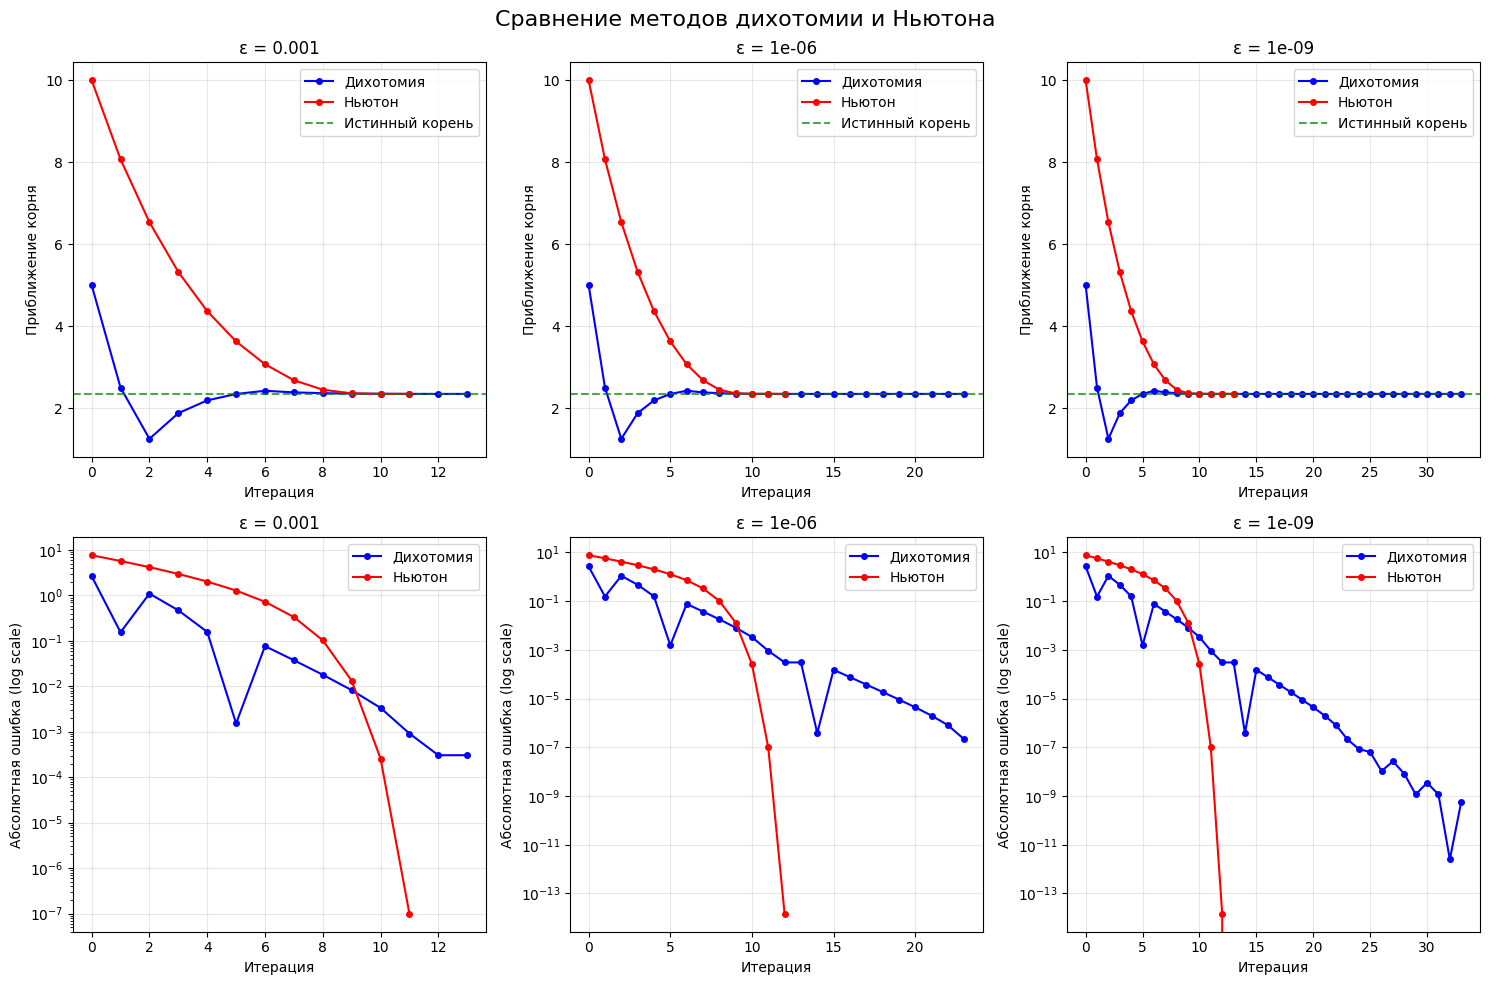

Сравнительная таблица методов:
Точность | Метод      | Итерации | Корень
--------------------------------------------------
1.0e-03  | Дихотомия  | 14       | 2.3455810547
1.0e-03  | Ньютон     | 11       | 2.3452755949
--------------------------------------------------
1.0e-06  | Дихотомия  | 24       | 2.3452752829
1.0e-06  | Ньютон     | 12       | 2.3452754959
--------------------------------------------------
1.0e-09  | Дихотомия  | 34       | 2.3452754965
1.0e-09  | Ньютон     | 13       | 2.3452754959
--------------------------------------------------

Анализ скорости сходимости:


C:\Users\HonoR\AppData\Local\Temp\ipykernel_9140\3365934094.py:70: RuntimeWarning: divide by zero encountered in log
  newt_log_errors = np.log(newt_errors[1:])


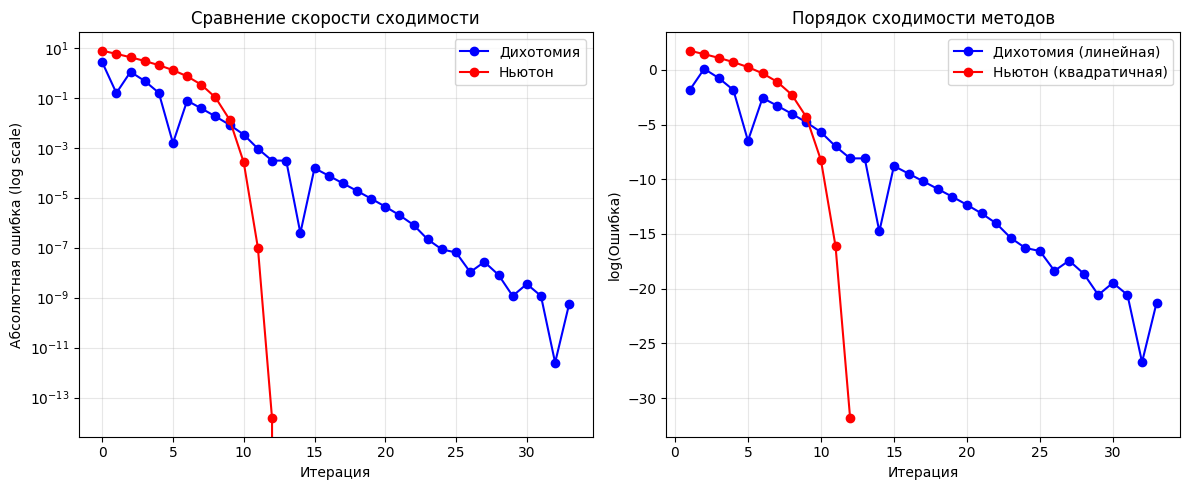

In [12]:
eps_values = [1e-3, 1e-6, 1e-9]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Сравнение методов дихотомии и Ньютона', fontsize=16)

for i, eps in enumerate(eps_values):
    # Метод дихотомии
    dich_iter, dich_errors, dich_n = dichotomy_method_with_history(eps)
    
    # Метод Ньютона
    newt_iter, newt_errors, newt_n = newton_method_with_history(eps)
    
    # График сходимости (значения на итерациях)
    axes[0, i].plot(range(len(dich_iter)), dich_iter, 'bo-', label='Дихотомия', markersize=4)
    axes[0, i].plot(range(len(newt_iter)), newt_iter, 'ro-', label='Ньютон', markersize=4)
    axes[0, i].axhline(y=2.3452754959023316, color='g', linestyle='--', label='Истинный корень', alpha=0.7)
    axes[0, i].set_title(f'ε = {eps}')
    axes[0, i].set_xlabel('Итерация')
    axes[0, i].set_ylabel('Приближение корня')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # График ошибки
    axes[1, i].semilogy(range(len(dich_errors)), dich_errors, 'bo-', label='Дихотомия', markersize=4)
    axes[1, i].semilogy(range(len(newt_errors)), newt_errors, 'ro-', label='Ньютон', markersize=4)
    axes[1, i].set_title(f'ε = {eps}')
    axes[1, i].set_xlabel('Итерация')
    axes[1, i].set_ylabel('Абсолютная ошибка (log scale)')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сводная таблица результатов
print("Сравнительная таблица методов:")
print("Точность | Метод      | Итерации | Корень")
print("-" * 50)

for eps in eps_values:
    # Дихотомия
    dich_iter, dich_errors, dich_n = dichotomy_method_with_history(eps)
    # Ньютон
    newt_iter, newt_errors, newt_n = newton_method_with_history(eps)
    
    print(f"{eps:<8.1e} | Дихотомия  | {dich_n:<8} | {dich_iter[-1]:.10f}")
    print(f"{eps:<8.1e} | Ньютон     | {newt_n:<8} | {newt_iter[-1]:.10f}")
    print("-" * 50)

# Анализ скорости сходимости
print("\nАнализ скорости сходимости:")
eps_test = 1e-9
dich_iter, dich_errors, dich_n = dichotomy_method_with_history(eps_test)
newt_iter, newt_errors, newt_n = newton_method_with_history(eps_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogy(range(len(dich_errors)), dich_errors, 'bo-', label='Дихотомия')
plt.semilogy(range(len(newt_errors)), newt_errors, 'ro-', label='Ньютон')
plt.xlabel('Итерация')
plt.ylabel('Абсолютная ошибка (log scale)')
plt.title('Сравнение скорости сходимости')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Линейная регрессия для оценки порядка сходимости
dich_log_errors = np.log(dich_errors[1:])
newt_log_errors = np.log(newt_errors[1:])

dich_iter_idx = np.arange(1, len(dich_errors))
newt_iter_idx = np.arange(1, len(newt_errors))

plt.plot(dich_iter_idx, dich_log_errors, 'bo-', label='Дихотомия (линейная)')
plt.plot(newt_iter_idx, newt_log_errors, 'ro-', label='Ньютон (квадратичная)')
plt.xlabel('Итерация')
plt.ylabel('log(Ошибка)')
plt.title('Порядок сходимости методов')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

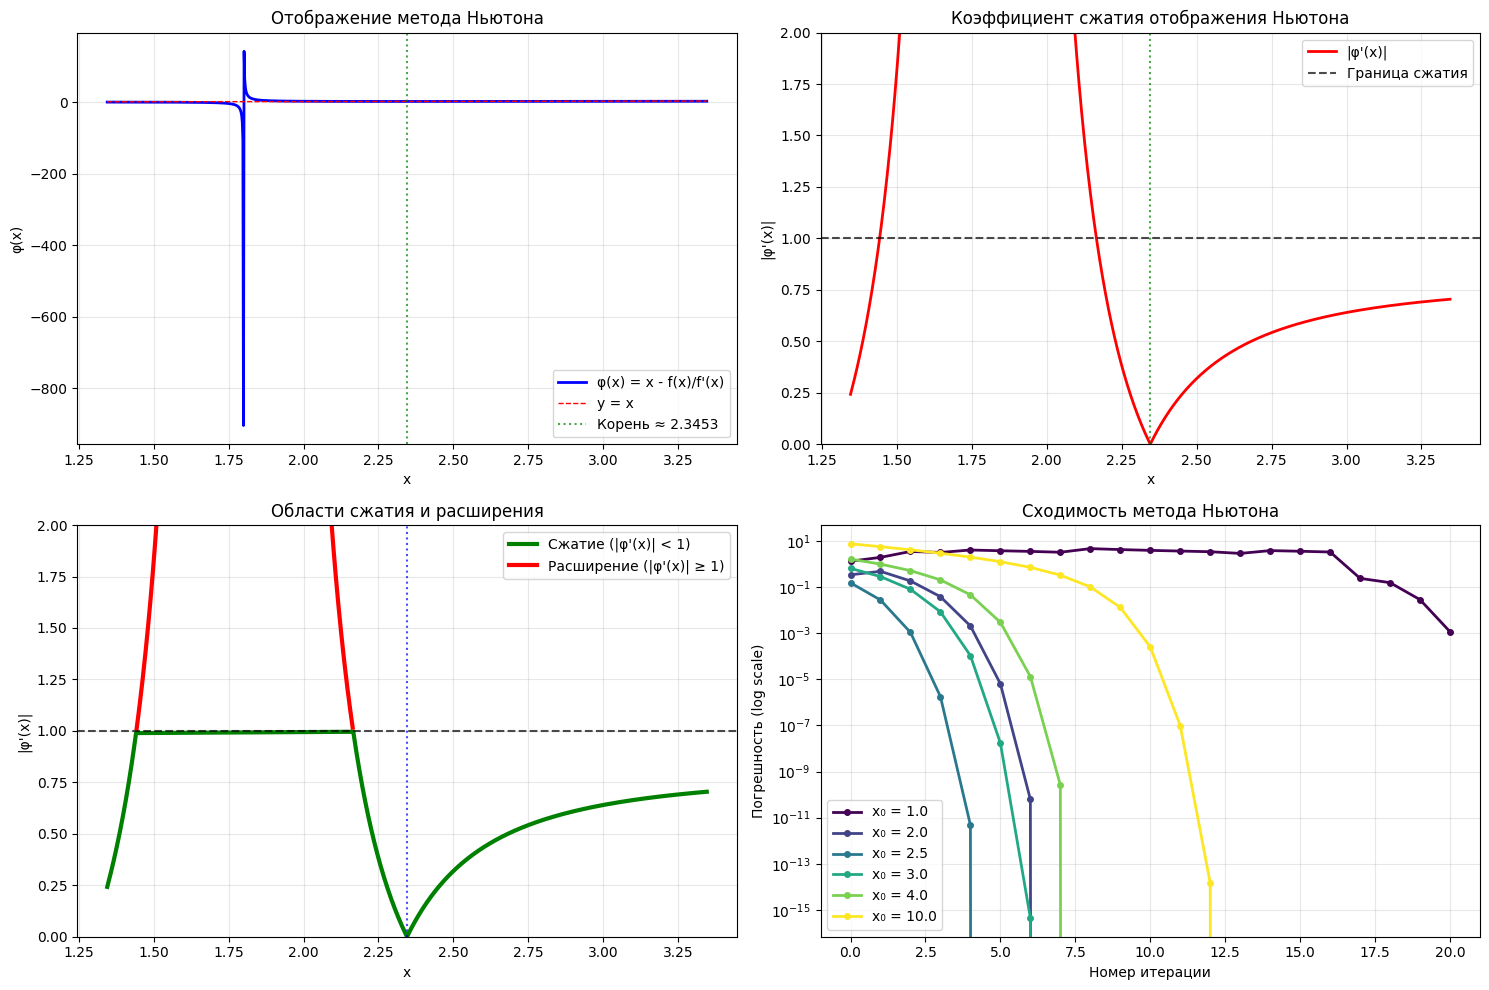

Выводы:
--------------------------------------------------
Отображение является сжимающим в окрестности корня
Скорость сходимости: линейная с коэффициентом 0.0000
Область сжатия: [1.3453, 3.3453]
Ширина области сжатия: 2.0000
Производная φ'(x) непрерывна в окрестности корня
Корень является неподвижной точкой отображения


In [26]:
def newton_iteration(x):
    return x - f(x) / df_dx(x)

def analyze_newton_contraction():
    # Область исследования вокруг корня
    root = 2.3452754959023316
    x_range = np.linspace(root - 1, root + 1, 1000)
    
    # Вычисляем значения отображения Ньютона
    newton_values = newton_iteration(x_range)
    
    # Вычисляем производную отображения Ньютона
    # d(phi)/dx = 1 - (f'(x)^2 - f(x)f''(x)) / (f'(x))^2
    def d_phi_dx(x):
        f_val = f(x)
        df_val = df_dx(x)
        d2f_val = 20*x**3 - 12*x**2 - 18*x  # Вторая производная f''(x)
        return (f_val * d2f_val) / (df_val**2)
    
    contraction_factors = np.abs(d_phi_dx(x_range))
    
    # Визуализация
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. График отображения Ньютона
    ax1.plot(x_range, newton_values, 'b-', linewidth=2, label='φ(x) = x - f(x)/f\'(x)')
    ax1.plot(x_range, x_range, 'r--', linewidth=1, label='y = x')
    ax1.axvline(x=root, color='g', linestyle=':', alpha=0.7, label=f'Корень ≈ {root:.4f}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('φ(x)')
    ax1.set_title('Отображение метода Ньютона')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Коэффициент сжатия
    ax2.plot(x_range, contraction_factors, 'r-', linewidth=2, label='|φ\'(x)|')
    ax2.axhline(y=1, color='k', linestyle='--', alpha=0.7, label='Граница сжатия')
    ax2.axvline(x=root, color='g', linestyle=':', alpha=0.7)
    ax2.set_xlabel('x')
    ax2.set_ylabel('|φ\'(x)|')
    ax2.set_title('Коэффициент сжатия отображения Ньютона')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 2)
    
    # 3. Области сжатия и расширения
    contraction_regions = contraction_factors < 1
    expansion_regions = contraction_factors >= 1
    
    ax3.plot(x_range[contraction_regions], contraction_factors[contraction_regions], 
             'g-', linewidth=3, label='Сжатие (|φ\'(x)| < 1)')
    ax3.plot(x_range[expansion_regions], contraction_factors[expansion_regions], 
             'r-', linewidth=3, label='Расширение (|φ\'(x)| ≥ 1)')
    ax3.axhline(y=1, color='k', linestyle='--', alpha=0.7)
    ax3.axvline(x=root, color='b', linestyle=':', alpha=0.7)
    ax3.set_xlabel('x')
    ax3.set_ylabel('|φ\'(x)|')
    ax3.set_title('Области сжатия и расширения')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 2)
    
    # 4. Исследование сходимости для разных начальных приближений
    initial_guesses = [1.0, 2.0, 2.5, 3.0, 4.0, 10.0]
    colors = plt.cm.viridis(np.linspace(0, 1, len(initial_guesses)))
    
    for i, x0 in enumerate(initial_guesses):
        iterations = [x0]
        errors = [abs(x0 - root)]
        
        for _ in range(20):
            x_new = newton_iteration(iterations[-1])
            iterations.append(x_new)
            errors.append(abs(x_new - root))
            
            if abs(x_new - iterations[-2]) < 1e-10:
                break
        
        ax4.semilogy(errors, 'o-', color=colors[i], linewidth=2, 
                    label=f'x₀ = {x0}', markersize=4)
    
    ax4.set_xlabel('Номер итерации')
    ax4.set_ylabel('Погрешность (log scale)')
    ax4.set_title('Сходимость метода Ньютона')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Аналитические выводы
    print("Выводы:")
    print("-"*50)
    
    # Коэффициент сжатия в окрестности корня
    root_contraction = abs(d_phi_dx(root))
    # print(f"Коэффициент сжатия в корне: |φ'({root:.4f})| = {root_contraction:.6f}")
    
    if root_contraction < 1:
        print("Отображение является сжимающим в окрестности корня")
        print(f"Скорость сходимости: линейная с коэффициентом {root_contraction:.4f}")
    else:
        print("Отображение не является сжимающим в окрестности корня")
    
    # Находим область сжатия
    contraction_interval = x_range[contraction_factors < 1]
    if len(contraction_interval) > 0:
        contraction_start = contraction_interval[0]
        contraction_end = contraction_interval[-1]
        print(f"Область сжатия: [{contraction_start:.4f}, {contraction_end:.4f}]")
        print(f"Ширина области сжатия: {contraction_end - contraction_start:.4f}")
    else:
        print("Область сжатия не найдена")
    
    # Проверка непрерывности производной
    try:
        test_points = np.linspace(root - 0.5, root + 0.5, 100)
        derivative_values = d_phi_dx(test_points)
        if not np.any(np.isnan(derivative_values)) and not np.any(np.isinf(derivative_values)):
            print("Производная φ'(x) непрерывна в окрестности корня")
        else:
            print("Производная φ'(x) имеет разрывы в окрестности корня")
    except:
        print("Ошибка при проверке непрерывности производной")
    
    # Проверка существования неподвижной точки
    if abs(newton_iteration(root) - root) < 1e-10:
        print("Корень является неподвижной точкой отображения")
    else:
        print("Корень не является неподвижной точкой")

def plot_newton_basins():
    """Визуализация бассейнов притяжения метода Ньютона"""
    
    # Создаем сетку точек в комплексной плоскости
    x_real = np.linspace(-3, 5, 800)
    x_imag = np.linspace(-3, 3, 800)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X = X_real + 1j * X_imag
    
    Z = X.copy()
    for i in range(20):
        Z = Z - f(Z) / df_dx(Z)

    root = 2.3452754959023316
    basins = np.abs(Z - root) < 0.1
    
    # Визуализация
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 2)
    # График функции для контекста
    x_plot = np.linspace(-2, 4, 1000)
    plt.plot(x_plot, f(x_plot), 'b-', linewidth=2, label='f(x)')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=root, color='r', linestyle='--', alpha=0.7, label=f'Корень ≈ {root:.4f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Функция f(x)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Запуск анализа
if __name__ == "__main__":
    analyze_newton_contraction()